### The purpose of this notebook will be twofold:
* First, I will plot the satellite fraction $f_{sat}$ of the galaxies in the model file.
* I also want to make a two-plot figure comparing the data and model (**Update:** I did that in the other notebook.)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table , Column
from astropy.io import fits
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'stixgeneral'
%matplotlib inline

In [2]:
# import the data file
data_pth = '/Users/greg/Desktop/git_projects/catalog_plots/data/'
model = data_pth + 'um_smdpl_model_logms_tot_11.4.fits'

According to Song, the data are structured such that the centrals and satellites are already labelled. For this project, the useful columns are:
* `logms_tot_mod`
* `upid == -1` for centrals.

In [71]:
hdu1 = fits.open(model)
# create astropy table of useful data
model_table = Table()
model_table['logms_tot_mod'] = hdu1[1].data['logms_tot_mod']
model_table['upid'] = hdu1[1].data['upid']
model_table.sort('logms_tot_mod')

In [73]:
# I'm not sure if I'll be doing this quite right, but we'll see

# lists to populate with the data
centrals = []
sats = []

for i in range(27241):
    if model_table['upid'][i] == -1:
        centrals.append(model_table['logms_tot_mod'][i])
    else:
        sats.append(model_table['logms_tot_mod'][i])    

In [74]:
print(len(sats),len(centrals))

2911 24330


In [96]:
# range of masses
mmin = np.min(model_table['logms_tot_mod'])
mmax = np.max(model_table['logms_tot_mod'])


# from Song's satellite finding code

hist_cen, edges_cen = np.histogram(centrals, range = [11.5,mmax], bins=8)
hist_sat, edges_sat = np.histogram(sats, range = [11.5,mmax], bins=8)

mass_center = (edges_cen[1:] + edges_cen[:-1]) / 2

frac_sat = (hist_sat / hist_cen) * 100

Text(0.5,1,'Model')

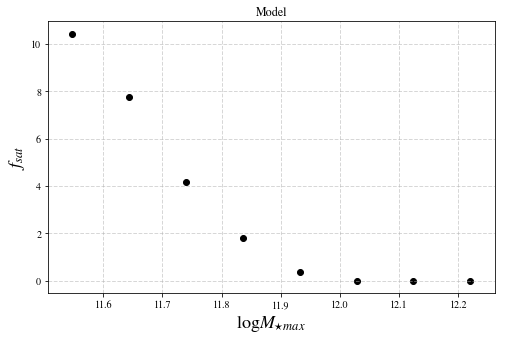

In [106]:
fig = plt.figure(figsize = [8,5])
ax1 = fig.add_subplot(111)
ax1.grid(linewidth=1, linestyle='--', alpha=0.5)

ax1.scatter(mass_center , frac_sat, color = 'k')
ax1.set_xlabel(r'$\log M_{\star max}$', fontsize = 18)
ax1.set_ylabel(r'$f_{sat}$', fontsize = 18)
ax1.set_title('Model')

In [160]:
# now I will make a fit to this profile

#from scipy.optimize import curve_fit
#def func(x,a,b):
#    return(a * np.exp(-b * x))
#popt, pcov = curve_fit(func, mass_center, frac_sat)

# exponential fit not working. I'll do a simple polynomial fit for now

fit = np.polyfit(mass_center , frac_sat , 5)
fit_fn = np.poly1d(fit)
x = np.arange(np.min(mass_center) , np.max(mass_center) , 0.01)

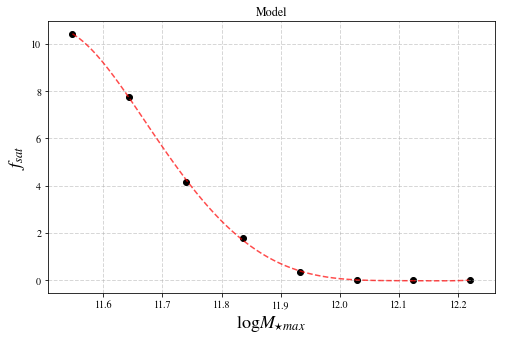

In [161]:
fig = plt.figure(figsize = [8,5])
ax1 = fig.add_subplot(111)
ax1.grid(linewidth=1, linestyle='--', alpha=0.5)

ax1.scatter(mass_center , frac_sat, color = 'k')
ax1.set_xlabel(r'$\log M_{\star max}$', fontsize = 18)
ax1.set_ylabel(r'$f_{sat}$', fontsize = 18)
ax1.set_title('Model')
ax1.plot(x, fit_fn(x), linestyle = '--', color = 'r', alpha = 0.7)